In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
plt.rcParams['figure.figsize'] = [10,6]

In [2]:
x,y = datasets.make_moons(n_samples = 200, noise = 0.15)

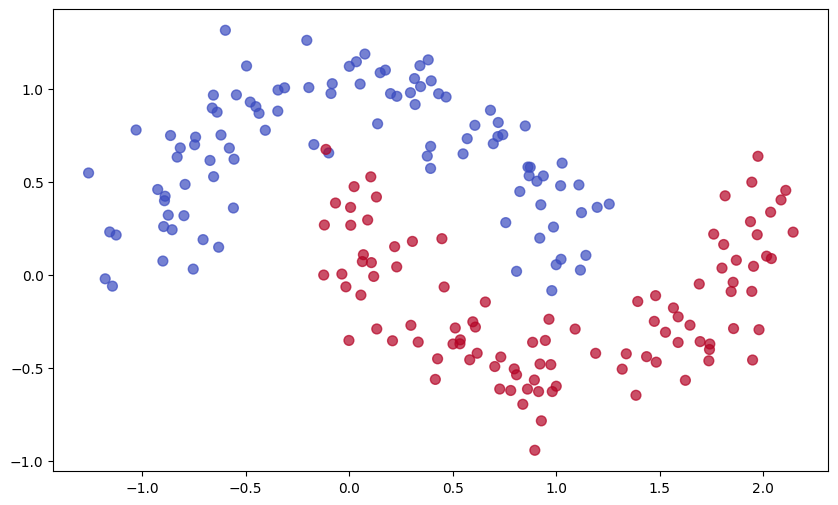

In [3]:
plt.scatter(x[:,0],x[:,1], s = 50, c = y, alpha = 0.7, cmap = 'coolwarm')

In [4]:
def init_network(input_neurons, hidden_neurons, output_neurons):
  
  W1 = np.random.randn(input_neurons, hidden_neurons) / np.sqrt(input_neurons)
  b1 = np.zeros((1,hidden_neurons))
  W2 = np.random.randn(hidden_neurons, output_neurons) / np.sqrt(hidden_neurons)
  b2 = np.zeros((1,output_neurons))
  model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
  return model_dict

In [5]:
def retrieve(model_dict):
  W1 = model_dict['W1']
  b1 = model_dict['b1']
  W2 = model_dict['W2']
  b2 = model_dict['b2']
  return W1, b1, W2, b2
  

In [8]:
model_dict = init_network(input_neurons, hidden_neurons, output_neurons)

In [9]:
W1, b1, W2, b2 = retrieve(model_dict)

In [15]:
x.shape,W1.shape

((200, 2), (2, 8))

In [14]:
x.dot(W1).shape

(200, 8)

In [ ]:
def forward(x, model_dict):
  W1, b1, W2, b2 = retrieve(model_dict)

  z1 = x.dot(W1) + b1
  #activation
  a1 = np.tanh(z1)
  
  z2 = a1.dot(W2) + b2
  a2 = np.tanh(z2)

  exp_scores = np.exp(a2)
  softmax = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
  return z1, a1, softmax

In [ ]:
def loss(softmax, y, model_dict):
  W1, b1, W2, b2 = retrieve(model_dict)
  m = np.zeros(y.shape[0])
  for i, correct_index in enumerate(y):
    predicted = softmax[i][correct_index]
    m[i] = predicted
    
  log_prob = -np.log(m)
  softmax_loss = np.sum(log_prob)
  reg_loss = lambda_regulazation/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
  loss = softmax_loss + reg_loss
  
  return float(loss/y.shape[0])

In [ ]:
def backpropagation(x, y, model_dict, epochs):

  for i in range(epochs):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1, a1, probs = forward(x, model_dict)
    delta3 =np.copy(probs)
    delta3[range(x.shape[0]), y] -= 1 # return only the correct prediction position
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    delta2 = delta3.dot(W2.T) * (1-np.power(np.tanh(z1),2))
    dW1 = np.dot(x.T, delta2)
    db1 = np.sum(delta2, axis = 0, keepdims = True)
    #regularization
    dW1 += lambda_regulazation * np.sum(W1)
    dW2 += lambda_regulazation * np.sum(W2)
    #updata weights
    W1 += -learning_rate*dW1
    b1 += -learning_rate*db1
    W2 += -learning_rate*dW2
    b2 += -learning_rate*db2
    #uptade model
    model_dict = {'W1': W1, 'b1': b1, 'W2':W2, 'b2':b2}
    #print loss
    if i % 50 == 0:
      prediction = np.argmax(probs,axis=1)
      correct = (prediction == y).sum()
      accuracy = correct/y.shape[0]
      print(f'Loss at epoch {i}: {loss(probs, y, model_dict):.3f}. Accuracy: {accuracy:.2f}')
  
  return model_dict

In [7]:
input_neurons = 2
hidden_neurons = 8
output_neurons = 2
samples = x.shape[0]
learning_rate = 0.001
lambda_regulazation = 0.01
epochs = 1000

In [ ]:
model_dict = init_network(input_neurons, hidden_neurons, output_neurons)
model = backpropagation(x, y, model_dict, epochs)

Loss at epoch 0: 0.555. Accuracy: 0.76
Loss at epoch 50: 0.365. Accuracy: 0.85
Loss at epoch 100: 0.371. Accuracy: 0.85
Loss at epoch 150: 0.380. Accuracy: 0.86
Loss at epoch 200: 0.387. Accuracy: 0.86
Loss at epoch 250: 0.393. Accuracy: 0.85
Loss at epoch 300: 0.397. Accuracy: 0.85
Loss at epoch 350: 0.401. Accuracy: 0.85
Loss at epoch 400: 0.402. Accuracy: 0.85
Loss at epoch 450: 0.396. Accuracy: 0.86
Loss at epoch 500: 0.392. Accuracy: 0.87
Loss at epoch 550: 0.390. Accuracy: 0.87
Loss at epoch 600: 0.385. Accuracy: 0.87
Loss at epoch 650: 0.379. Accuracy: 0.88
Loss at epoch 700: 0.375. Accuracy: 0.88
Loss at epoch 750: 0.374. Accuracy: 0.88
Loss at epoch 800: 0.376. Accuracy: 0.88
Loss at epoch 850: 0.377. Accuracy: 0.88
Loss at epoch 900: 0.379. Accuracy: 0.88
Loss at epoch 950: 0.382. Accuracy: 0.88
